**Model Training**

**Import Data and Required Packages**

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Model Selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Classification Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)


In [3]:
loan_df=pd.read_csv(r'C:\Users\DELL\Desktop\virat\loan_prediction.csv')

In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_df.replace({"3+":"4"})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
# seperate categorical and numerical columns
num=loan_df.select_dtypes(include=['number']).columns
cat=loan_df.select_dtypes(include=['object', 'category']).columns
print('Cat:',cat)
print('num:',num)

Cat: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
num: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [7]:
loan_df[num]=loan_df[num].fillna(loan_df[num].median())

In [8]:
loan_df[cat]=loan_df[cat].fillna(loan_df[cat].mode().iloc[0])

In [9]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
X = loan_df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = loan_df['Loan_Status']

In [11]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

In [14]:
print(loan_df.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 13)
(491, 11)
(123, 11)
(491,)
(123,)


In [83]:
from sklearn.linear_model import LogisticRegression
logtree=LogisticRegression()
logtree.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
y_pred_log=logtree.predict(X_test)

In [85]:
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 78.86
F1 is: 0.86
Precision is: 0.76
Recall is: 0.99


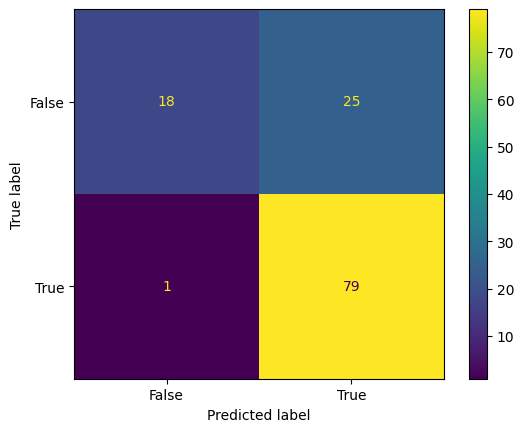

True negative: 18
False postive: 25
False negative: 1
True postive: 79


In [86]:
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

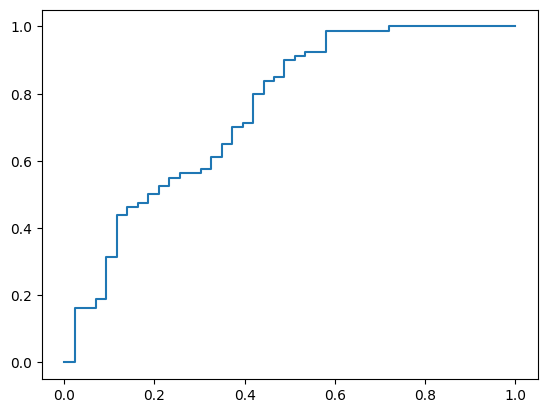

In [87]:
y_log_pred_prob=logtree.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [88]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

from sklearn.model_selection import GridSearchCV,cross_val_score
grid_log=LogisticRegression()
grid_log

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [89]:
log_params=[keys for keys in grid_log.get_params()]
log_params

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [90]:
grid_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [91]:
log_grid={
    'C':[1.0,'entropy'],
    'intercept_scaling':[4,6,7,8,9,10],
    'fit_intercept':[True],
    'warm_start':[False],
    'max_iter':[0,42]
         
}

In [92]:
grid_search = GridSearchCV(grid_log,  # Base modl
                           log_grid, # params 
                           scoring='accuracy', # metric
                           cv=4,
                          verbose=True)

In [93]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


,estimator,LogisticRegression()
,param_grid,"{'C': [1.0, 'entropy'], 'fit_intercept': [True], 'intercept_scaling': [4, 6, ...], 'max_iter': [0, 42], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,4
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [94]:
grid_search.best_index_

np.int64(1)

In [95]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 42,
 'warm_start': False}

In [96]:
grid_search.best_score_

np.float64(0.8167066506730641)

In [97]:
grid_search.best_estimator_

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,4
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,42
,multi_class,'deprecated'


In [98]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 1.0,
                       fit_intercept= True,
                       intercept_scaling= 4,
                       max_iter=42,
                       warm_start= False)
log.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,4
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,42
,multi_class,'deprecated'


In [99]:
y_pred_log=log.predict(X_test)


In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)

print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)

accuray is: 78.86
F1 is: 0.86
Precision is: 0.76
Recall is: 0.99


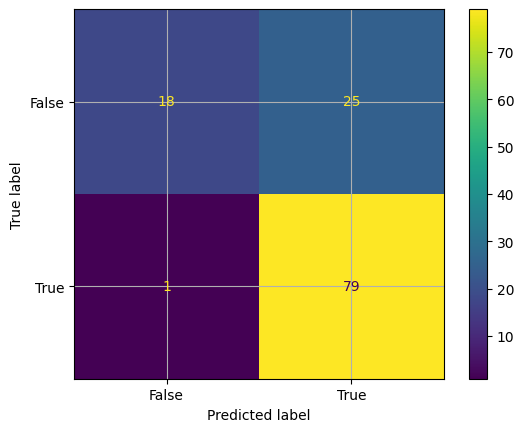

True negative: 18
False postive: 25
False negative: 1
True postive: 79


In [101]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(True)
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


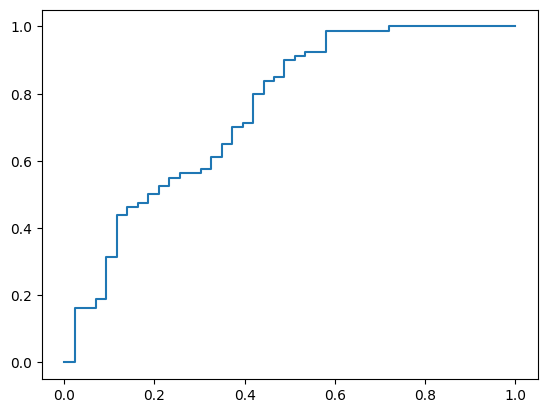

In [102]:
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [103]:
dict1={'Accuracy':[acc_log],
      "Precision":[precision_log],
      "Recall":[recall_log],
    "F1-score":[f1_log]}

pd.DataFrame(dict1,index=['Logistic Regression '])

,Accuracy,Precision,Recall,F1-score
Logistic Regression,78.86,0.76,0.99,0.86
